In [1]:
from offloading_dataloader import Dataloader, plot_example
import autoencoder
import torch

latent_size = 32

class_autoencoder_path = f'../networks/autoencoder_h{latent_size}.pth'
batch_size = 1024

In [2]:
dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor
dataloader = Dataloader(image_path='../data/train-images.idx3-ubyte',
                        label_path='../data/train-labels.idx1-ubyte',
                        dtype=dtype, batch_size=batch_size)

or_img, trns_img, lbl, pose = dataloader.sample(100)

F:\OneDrive\Documents\University\Bachelor Thesis\active_mnist_thesis\offloading_dataloader.py:81: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:189.)
  self.images = torch.Tensor(np.reshape(images, [images.shape[0], 1, images.shape[1], images.shape[2]]))


Active MNIST Dataloader initialized on <class 'torch.cuda.FloatTensor'>
batch_size = 1024, iterations = 64
     Sampling indices
     Creating random transformation values
     Padding images
     Transforming images


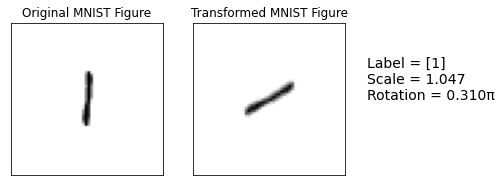

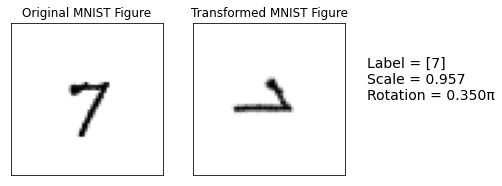

In [3]:
plot_example(or_img, trns_img, lbl, pose, number_examples=2)

finished training


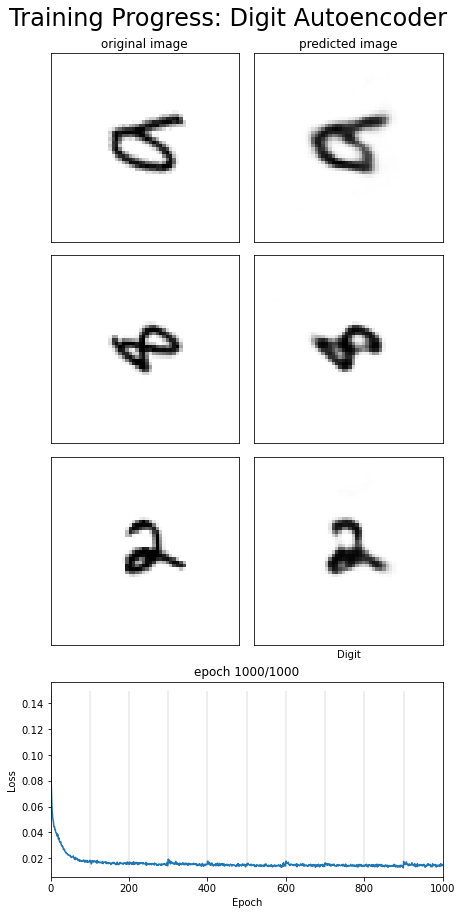

In [4]:
# Training
dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor

autoencoder = autoencoder.Autoencoder(hidden_size=latent_size, dtype=dtype, batch_size=batch_size)
autoencoder.cuda()
loss = autoencoder.train_net(dataloader, max_epochs=1000, sample_length=100)
torch.save(autoencoder.state_dict(), class_autoencoder_path)
print('finished training')